## Practicum Problems


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

### Problem 1
(visualize and analyze titanic dataset)

In [2]:
# import and group specific feature wise
titanic = sns.load_dataset("titanic")
survived_male = titanic[ (titanic['survived'] == 1) & (titanic['sex'] == 'male') ]
survived_female = titanic[ (titanic['survived'] == 1) & (titanic['sex'] == 'female') ]
dead_male = titanic[ (titanic['survived'] == 0) & (titanic['sex'] == 'male') ]
dead_female = titanic[ (titanic['survived'] == 0) & (titanic['sex'] == 'female') ]

<AxesSubplot:title={'center':'# of Dead Female v/s Age'}, ylabel='Frequency'>

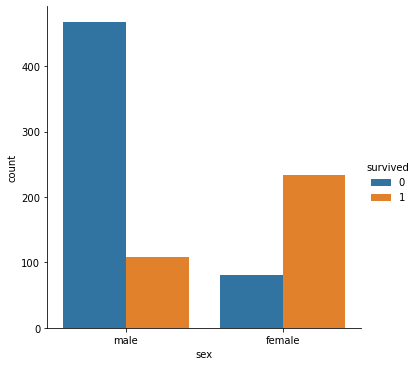

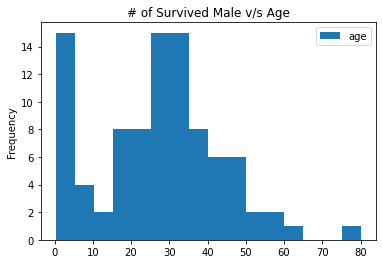

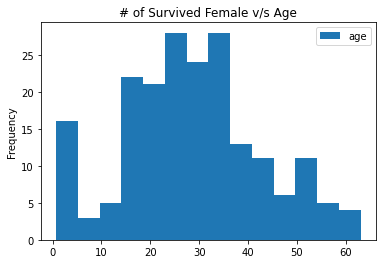

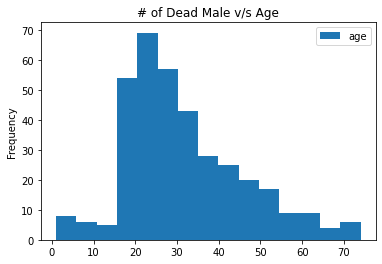

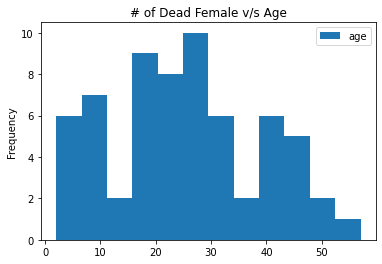

In [3]:
# plot histogram for the groups
sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
survived_male[['age']].plot(kind='hist',bins=16,title='# of Survived Male v/s Age')
survived_female[['age']].plot(kind='hist',bins=14,title='# of Survived Female v/s Age')
dead_male[['age']].plot(kind='hist',bins=15,title='# of Dead Male v/s Age')
dead_female[['age']].plot(kind='hist',bins=12,title='# of Dead Female v/s Age')

__conclusion:__

From a visual inspection it can be observed that the ratio of male:female population is approximately 1.75 ~ 7:4.
From the 'Sex v/s Survived' plot it can be observed that the number of females who survived is more than double then that of females who have died. On the other hand in males, the number of males who have died is approximately five time the number of males who have survived. 

Looking at the histgram with respect to survival & Sex against age, it can be observed that chances of survival for males between ages 20-50 were the least and the most deaths were from this area. But it can also be observed that the changes of survival for male who were kids or old were high. Other the other hand, in females, the death plot seems to be balanced. These observations are because (in reality) priority was given to woman, children and old people when the life boats were being loaded.
______________

### Problem 2
(Load auto_mpg dataset -> replace '?' in horsepower feature to NaN -> find variance when imputer with mean, median and mode)

In [4]:
# load and prepare data
auto_mpg = pd.read_csv("./data/auto-mpg.data", delim_whitespace=True, header=None)
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
auto_mpg.columns=columns
auto_mpg["horsepower"].replace(to_replace={"?":np.nan}, inplace=True)
auto_mpg["horsepower"] = pd.to_numeric(auto_mpg["horsepower"])

# Explore Data
print(auto_mpg.describe())
print(f'\nVariance of horsepower = {auto_mpg["horsepower"].var()}')
print(f'Mode of horsepower = {auto_mpg["horsepower"].mode()}')

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [5]:
# mean imputation
imp_mean = SimpleImputer()
imp_mean = pd.DataFrame(imp_mean.fit_transform(auto_mpg.iloc[:, :-1]))
imp_mean.columns = columns[:-1]
imp_mean.index = auto_mpg.index

In [6]:
# median imputation
imp_median = SimpleImputer(strategy='median')
imp_median = pd.DataFrame(imp_median.fit_transform(auto_mpg.iloc[:, :-1]))
imp_median.columns = columns[:-1]
imp_median.index = auto_mpg.index

In [7]:
# mode imputation
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode = pd.DataFrame(imp_mode.fit_transform(auto_mpg.iloc[:, :-1]))
imp_mode.columns = columns[:-1]
imp_mode.index = auto_mpg.index

In [8]:
# Results
print(f'Variance of horsepower (mean imputation) =   {imp_mean["horsepower"].var()}')
print(f'Variance of horsepower (median imputation) = {imp_median["horsepower"].var()}')
print(f'Variance of horsepower (mode imputation) =   {imp_mode["horsepower"].var()}')

Variance of horsepower (mean imputation) =   1459.1779160026776
Variance of horsepower (median imputation) = 1460.96905180816
Variance of horsepower (mode imputation) =   1490.0361252104324


__Conclusion:__

Mean Imputation results into lowest variance. This is because of the way variance is calculated i.e. we take the sum of the difference of values from their mean and then divide that by the total number of values. But in our case since we are increasing the total number of values which are equal to mean, their contribution to the sum of the difference is 0. This ultimately results in a reduced varience.

The other method of imputing values that would match the distribution more accurately is using Multiple Imputation. In multiple imputations we calculate several different imputations, create several version of the same data with different imputations and then combine them to get the best values. This helps reduce bias and at the same time retain useful information that can be helpful to find co-variance and such. [(source)](https://www.statisticshowto.com/multiple-imputation/)
_____

### Problem 3
(find PCA and compare with original variance percent)

In [9]:
# Import Data
iris = load_iris()
iris_col = iris.feature_names
iris_df = pd.DataFrame(iris.data, columns=iris_col)

# Percent Variance
sep_len_var, sep_wid_var, pet_len_var, pet_wid_var = iris_df.var()
total_iris_var= sum(iris_df.var())
sep_len_var_per, sep_wid_var_per, pet_len_var_per, pet_wid_var_per = sep_len_var/total_iris_var,sep_wid_var/total_iris_var, pet_len_var/total_iris_var,pet_wid_var/total_iris_var

# Standardize
sc = StandardScaler()
iris_df_std = pd.DataFrame(sc.fit_transform(iris_df))

In [10]:
# PCA Decomposition
pca = PCA(n_components=4, svd_solver="full")
pca_df = pd.DataFrame(pca.fit_transform(iris_df_std.iloc[:,0:4]))
pca_var = pca.explained_variance_ratio_
pc1_var,pc2_var,pc3_var,pc4_var = pca_var[0],pca_var[1],pca_var[2],pca_var[3]

In [11]:
# Compare Variance of Original Feature and Principal components
print(f'{"Feature":<17}{"Variance (*100 = %)":<23}| {"Principal Comp.":<17}Variance (*100 = %)')
print(f'{"Sepal Length":<17}{sep_len_var_per:<23}| {"PC1":<17}{pc1_var}')
print(f'{"Sepal Width":<17}{sep_wid_var_per:<23}| {"PC2":<17}{pc2_var}')
print(f'{"Petal Length":<17}{pet_len_var_per:<23}| {"PC3":<17}{pc3_var}')
print(f'{"Petal width":<17}{pet_wid_var_per:<23}| {"PC4":<17}{pc4_var}')

Feature          Variance (*100 = %)    | Principal Comp.  Variance (*100 = %)
Sepal Length     0.14994532099467353    | PC1              0.7296244541329986
Sepal Width      0.04154410732328823    | PC2              0.22850761786701776
Petal Length     0.681457931997653      | PC3              0.03668921889282878
Petal width      0.12705263968438513    | PC4              0.005178709107154798


__Observation:__

Observing the variances from the original features, we realize that sepal width has the least variance i.e. the records do not spread much from the mean and are cluttered together. Petal length has the highest variance and it is useful for analysis.

Observing the First Principal Component we understand that it gives us better variance percentage. This is because the principal components are eigenvectors of the data's covariance matrix. Principal component represents the direction of a best-fitting line which is the one that minimizes the average squared distance from the points to the line.

For our analysis we need data that contributes more towards our analysis. Since principal components are directions constituting orthonormal basis, different individual dimensions of the data are linearly uncorrelated to them. Thus we are preserving as much of the data's variation as possible.
________

### Problem 4

PC1 v/s Sepal Length:
Correlation Coefficient = 0.8901687648612951
Cosine Similarity = 0.12449019771928183


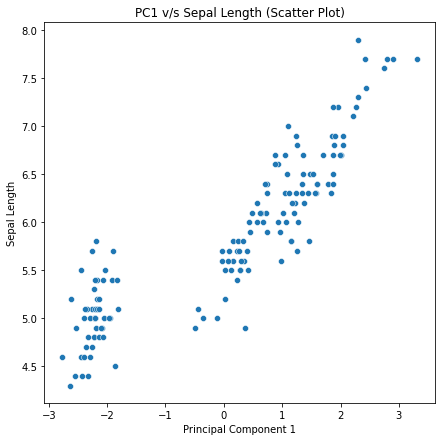

In [12]:
# Plot Sepal Length vs PC1
plt.figure(figsize=(7,7))
sns.scatterplot(x=pca_df.iloc[:,0], y=iris_df.iloc[:,0])
plt.xlabel('Principal Component 1')
plt.ylabel('Sepal Length')
plt.title('PC1 v/s Sepal Length (Scatter Plot)')
print('PC1 v/s Sepal Length:')
print(f'Correlation Coefficient = {np.corrcoef(pca_df.iloc[:,0], iris_df.iloc[:,0])[1][0]}')
print(f'Cosine Similarity = {1 - cosine(pca_df.iloc[:,0],iris_df.iloc[:,0])}')

PC1 v/s Sepal Width:
Correlation Coefficient = -0.4601427064479081
Cosine Similarity = -0.06473068500170664


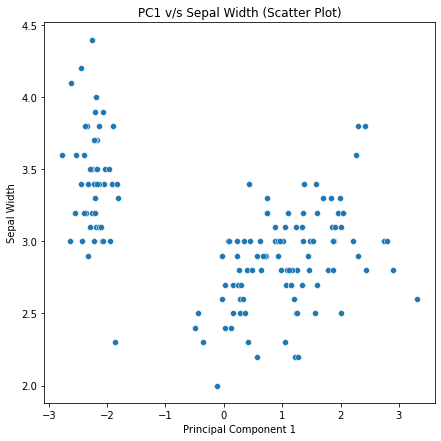

In [13]:
# Plot Sepal Width vs PC1
plt.figure(figsize=(7,7))
sns.scatterplot(x=pca_df.iloc[:,0], y=iris_df.iloc[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Sepal Width')
plt.title('PC1 v/s Sepal Width (Scatter Plot)')
print('PC1 v/s Sepal Width:')
print(f'Correlation Coefficient = {np.corrcoef(pca_df.iloc[:,0], iris_df.iloc[:,1])[1][0]}')
print(f'Cosine Similarity = {1 - cosine(pca_df.iloc[:,0],iris_df.iloc[:,1])}')

PC1 v/s Petal Length:
Correlation Coefficient = 0.9915551834193603
Cosine Similarity = 0.4204266990041009


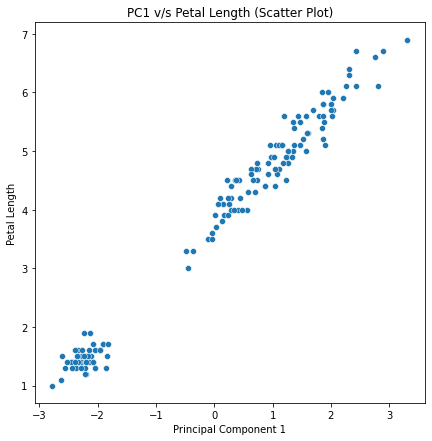

In [14]:
# Plot Petal Length vs PC1
plt.figure(figsize=(7,7))
sns.scatterplot(x=pca_df.iloc[:,0], y=iris_df.iloc[:,2])
plt.xlabel('Principal Component 1')
plt.ylabel('Petal Length')
plt.title('PC1 v/s Petal Length (Scatter Plot)')
print('PC1 v/s Petal Length:')
print(f'Correlation Coefficient = {np.corrcoef(pca_df.iloc[:,0], iris_df.iloc[:,2])[1][0]}')
print(f'Cosine Similarity = {1 - cosine(pca_df.iloc[:,0],iris_df.iloc[:,2])}')

PC1 v/s Petal Width:
Correlation Coefficient = 0.9649789606692489
Cosine Similarity = 0.5163697162322227


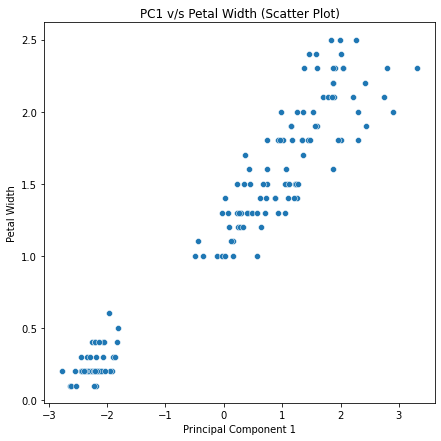

In [15]:
# Plot Petal Width vs PC1
plt.figure(figsize=(7,7))
sns.scatterplot(x=pca_df.iloc[:,0], y=iris_df.iloc[:,3])
plt.xlabel('Principal Component 1')
plt.ylabel('Petal Width')
plt.title('PC1 v/s Petal Width (Scatter Plot)')
print('PC1 v/s Petal Width:')
print(f'Correlation Coefficient = {np.corrcoef(pca_df.iloc[:,0], iris_df.iloc[:,3])[1][0]}')
print(f'Cosine Similarity = {1 - cosine(pca_df.iloc[:,0],iris_df.iloc[:,3])}')

__Conclusion:__

It can be observed that features sepal length and sepal width when projected onto PC1 have a Correlation Coefficient less then that of petal length and petal width. Infact even their plots are quite scattered. This can be supported by the Cosine Similarity found between those two features and the PC1 which is ~0 i.e. it is at approximately right angle to the Principal Component and have no match.

On the other hand, petal length and petal width have much more visually definite graph and also have a higher Correlation Coefficient and their Cosine Similarity comes to be around ~0.45 which is at approximately 45 degrees from the PC1.
___________

### Problem 5

In [16]:
# Find total variance of PCA
pca_df_nonstd = pd.DataFrame(pca.fit_transform(iris_df.iloc[:,0:4]))
pca_nonstd_variences = pca_df_nonstd.var()
pca_variences = pca_df.var()
total_pca_var = sum(pca_variences)
total_nonstd_pca_var = sum(pca_nonstd_variences)


# Find cumulative percents of PCA to find >95% threshold point
print(f'Cumulitive Percents-> {np.cumsum(pca_var)}')

Cumulitive Percents-> [0.72962445 0.95813207 0.99482129 1.        ]


In [17]:
# Compare total varience of PCA and Features 
print(f'{"Total varience of features:":<38}{total_iris_var}')
print(f'{"Total varience of PCA(standardized):":<38}{total_pca_var}')
print(f'{"Total varience of PCA:":<38}{total_nonstd_pca_var}')

Total varience of features:           4.572957046979867
Total varience of PCA(standardized):  4.026845637583895
Total varience of PCA:                4.572957046979873


__Conclusion:__ 

It can be observed that variance of the PCA and Original Features remains the same. Although the variance slightly reduces in PCA if the values are standardized, this is because the values get centered when standardization is performed but the PCA is performed better as data is centered.

If we wish to capture more then 95% of the variance of the original data, we need to select first 2 Principal Components as they combined cover 95.81% variance. This way we can reduce the dimensions from 4 to 2. Since PCA are the eigenvectors of the correlation matrix, we are capturing the vectors(PC) in directions that can include majority of the records.